# Condensator Ontwerpopdracht

Bij het vak elektromagnetisme zullen jullie in de eerste paar weken diep ingaan op de elektrostatica. Parallel hieraan zullen we bij het vak DEF-D, naast de fysieke ontwerpopdrachten en colleges, deze simulatie-ontwerpopdracht behandelen. Deze simulatie-opdracht is weer nauw verwoven met de tweede fysieke ontwerpopdracht die in week 3.3 gegeven wordt. Je moet het grootste deel van deze simulatie opdracht afronden voordat je aan de fysieke ontwerpopdracht van week 3.3 begint. Het laatste stuk van deze simulatie opdracht maak je na afloop van de fysieke opdracht. De deadline voor het inleveren van deze simulatie-opdracht is in week 3.4

Je werkt bij deze opdracht in teams die wij indelen. Zoek op Brightspace op met wie je samenwerkt en leg via email contact. Maak goede afspraken over hoe je samen gaat werken.

In deze simulatie opdracht beginnen we met een aantal simulaties van verschillende situaties, die jullie daarna zullen interpreteren. Daarna zal wat essentiële voorbereiding op de tweede fysieke ontwerpopdracht besproken worden. En als laatste zal dieper ingegaan worden op hoe jullie metingen van de tweede ontwerpopdracht afwijken van de theorie.

De opdracht bestaat uit de volgende sub-opdrachten die je moet doen voordat je begint aan de fysieke ontwerpopdracht van week 3.3:
1) Een puntlading in de oorsprong.
2) Een uniform geladen schijf bestaande uit puntladingen.
3) Een geladen schijf op een constant potentiaal.
4) Twee geleidende platen op potentiaal $V_1$ and $-V_1$.
5) Voorbereidende opdracht voor de DEF ontwerpopdracht.

Na de fysieke ontwerpopdracht van week 3.3 kan je ten slotte het laatste deel doen:

6) Reflectie opdracht voor na de fysieke ontwerpopdracht.

De opdracht wordt volledig online gedaan, er zullen hiervoor dus ook geen specifieke werkcolleges voor zijn ingeroosterd. Als jullie vragen hebben kunnen jullie die mailen naar het DEF e-mailadres: DEF-TNW@tudelft.nl. Deze opdracht wordt in week 3.4 beoordeeld en herkansingen zijn in week 3.5, zie de studiehandleiding voor details.
   
Technische Instructies:
- Git clone (als nog niet gedaan) het DEF repo en maak een branch voor werken aan deze opdracht. Nodig je groepsgenoot uit als collaborator. Hiervoor staat een manual op brightspace.
- Dit notebook maakt gebruik van een aantal functies die in het bestand ```functions_electrostatics.py``` staan. Dit bestand moet in dezelfde map (folder) staan als dit notebook. Als je git clone doet, gaat dat automatisch goed, maar verplaats dit notebook dus niet naar een andere map, mail het niet naar een mede-student, etc. Als je niet weet wat een map (folder) en een bestand is, bekijk dan [deze tutorial](https://teachbooks.io/files-and-folders/EN/intro.html).

Onderwijs Instructies:
- Beantwoord de vragen die in dit notebook voor komen direct in dit notebook.
- Als je iets moet printen op het scherm als antwoord op een vraag, doe dit op een gestructureerde manier met als dat relevant is de eenheid erbij, zoals je geleerd is bij het Inleidend Practicum.
- Vermijd 'hardcoden' waar mogelijk.
- Bij elke code cel staat aangegeven of jij hem moet aanpassen of alleen runnen. Lees bij cellen die je moet runnen, maar niet hoeft aan te passen, goed de code door om daarvan te leren en te gebruiken in de cellen die je wel moet aanpassen.

Elektrostatica Opmerkingen:
- In deze opdracht zullen jullie verschillende problemen bestuderen die as-symmetrie hebben. De opdrachten zullen daardoor, cilindrische coördinaten ($r$,$\phi$,$z$) gebruiken, waarbij $r$ de afstand tot de $z$ as is, $z$ de hoogte en $\phi$ de hoek met de $x$-as. Alle gebruikte problemen zullen ook in de $\phi$ richting symmetrisch zijn en die coördinaat zal dus niet uitmaken.
- Voor elke sub-opdracht zal eerst het potentiaal bepaald worden en daarna zal het elektrische veld bepaald worden met de "finite difference" methode. Dit is een methode om de afgeleide te nemen van een dataset. Deze methode is geen onderdeel van de leerdoelen van het vak en komt later in je studie aan bod. We gebruiken "finite difference" hier als gereedschap en als voorbeeld van wat je later nog tegen gaat komen.



Vul de informatie in deze cel in:

| Groep: 74     |  |
| :-------------|:-------------|
| Jan van de Poll | Student Studienummer 1 |
| Justin Sloots | 6541313 |

In [1]:
# Run deze cel, pas deze niet aan
import numpy as np
import matplotlib.pyplot as plt
from functions_electrostatics import *
#from IPython import display
from IPython.display import Image, display


epsilon0 = 8.854e-12  # permittiviteit van vacuum (F/m)

"""============================================================================================
We first define the size of the domain of calculation and spatial discretization of the domain
"""

# Grid van het rekendomein; het veld wordt berekend in het (r,z)-vlak (asymmetrie):
width_domain = 5  # (m)
height_domain = width_domain  # maximum afstand van de schijf tot de grond, boven en beneden (m)
grid_step = 0.1  # grid stap grootte (m)

### 1) Een puntlading in de oorsprong

In deze opdracht gaan we in op een numerieke benadering van het potentiaal en elektrische veld rond een puntlading in de oorsprong. 

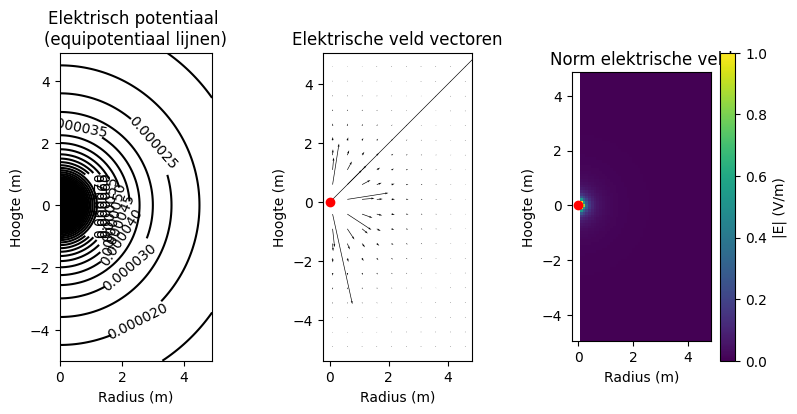

In [2]:
# Run deze cel, pas de cel niet aan
charge_one_point = 1e-14  # lading van 1 punt (C)

r, z, B = initialize_plane_grid_for_pt_charge_at_origin(height_domain, width_domain, grid_step)
V = calculate_V_point_charge_at_origin(charge_one_point, r, z)

Er, Ez, normE = compute_E_pt_charge(V, B, grid_step)  # gebruik de centered finite-difference method
# met Er de r-component, Ez de z-component en normE de norm van het elektrische veld

r_for_E = r[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de r-dimensie
z_for_E = z[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de z-dimensie

plot_results_pt_charge_at_origin(Ez, Er, normE, V, r, z, grid_step)


##### Vraag 1a Het potentiaal rond een puntlading

1. Bepaal welke index correspondeert met $z = 0$ m.
2. Plot de log van het potentiaal tegen de log van de straal.
3. Fit de log van het potentiaal met de log van de straal.
4. Print het exponent op een nette manier.

De index waar z gelijk is aan 0 is 50


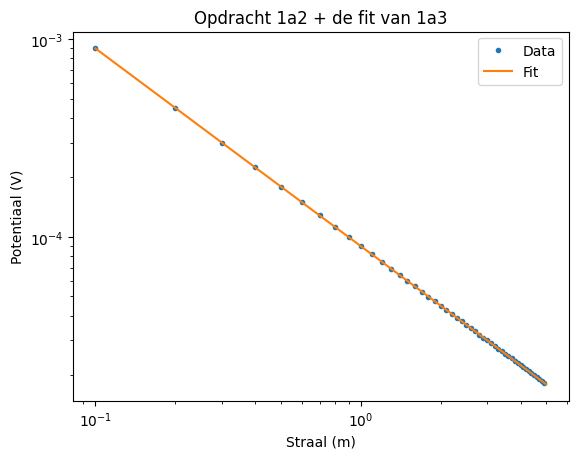

Het exponent is: -1.000


In [3]:
#Importeren van curve_fit
from scipy.optimize import curve_fit

index_z0 =  np.argmin(np.abs(z)) # Zoekt naar de laagste waarde van z nadat hier eerst de absolute waarde van is genomen, zodat de laagste waarde het dichtstebij 0 ligt.
print("De index waar z gelijk is aan 0 is", index_z0) 


# plotten van de log van het potentiaal tegen de log van de straal
plt.figure()
plt.loglog(r,V[index_z0], ".", label="Data")
plt.ylabel("Potentiaal (V)")
plt.xlabel("Straal (m)")
plt.title("Opdracht 1a2 + de fit van 1a3")
# plt.show()


def fitfunctie(r,a,b):
    return a*np.log10(r)+b  

pvar,pcov = curve_fit(fitfunctie,r[1:],np.log10(V[index_z0][1:])) # fitten van de functie
a = pvar[0]
b = pvar[1]

x_fit = np.linspace(0.1,5, 50)
y = fitfunctie(x_fit,a,b)

plt.loglog(x_fit,10**y, label="Fit")   # plotten van de fit, om te kijken of deze klopt
plt.legend()
plt.show() 


print(f"Het exponent is: {a:.3f}")

##### Vraag 1b Het elektrische veld rond een puntlading
1. Voer van vraag 1a 2 tot 4 uit voor het elektrische veld.

De index waar z gelijk is aan 0 is 49


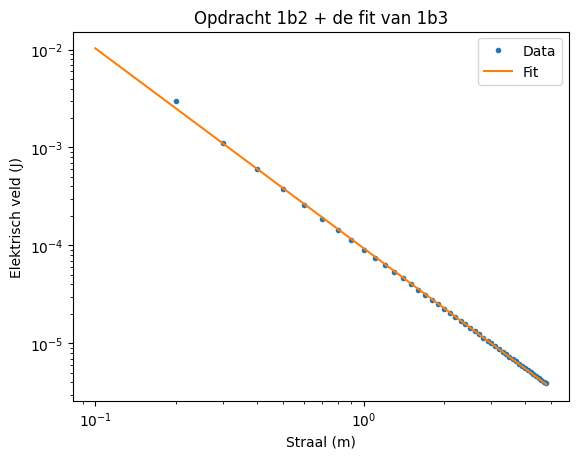

Het gevonden exponent voor het elektrisch veld is: -2.040


In [4]:
index_z0_E =  np.argmin(np.abs(z_for_E)) # Opnieuw zoeken naar de index van de laagste waarde van z, want deze is nu anders dan bij 1a, omdat de z_for_E array een andere
# grootte heeft dan de z array.
print("De index waar z gelijk is aan 0 is", index_z0_E) 

# plotten van de log van het elektrische veld tegen de log van de straal
plt.figure()
plt.loglog(r_for_E,normE[index_z0_E,:], ".", label="Data")
plt.ylabel("Elektrisch veld (J)")
plt.xlabel("Straal (m)")
plt.title("Opdracht 1b2 + de fit van 1b3")
# plt.show()

def fitfunctie(r,a_E,b_E):
    return a_E*np.log10(r)+b_E  

pvarE,pcovE = curve_fit(fitfunctie,r_for_E[1:],np.log10(normE[index_z0_E][1:])) # fitten van de functie
a_E = pvarE[0]
b_E = pvarE[1]

x_fit_E = np.linspace(r_for_E[0], r_for_E[-1], 50)
y_E = fitfunctie(x_fit_E, a_E, b_E)

plt.loglog(x_fit_E, 10**(y_E), label="Fit") # checken of de fit klopt
plt.legend()
plt.show()

print(f"Het gevonden exponent voor het elektrisch veld is: {a_E:.3f}")

### 2) Een uniform geladen schijf bestaande uit puntladingen

In de code hieronder wordt een geladen schijf gemaakt via het superpositie principe. Dit wordt gedaan door een rooster van punten in de ruimte te creëren, alle punten die voldoen aan $z = 0$ m en $r < R$ krijgen een lading charge_one_point en vanuit hier wordt het potentiaal bepaald. Hier is de $z$-as de as van de schijf en de r as de afstand tot de $z$-as.



In [5]:
# In vraag 2.1 wordt naar deze cel verwezen.
disk_radius = 10  # (m)
grid_step = 0.1  # (m)
z_coord_DISK = 0  # (m) positie van de schijf op de z-as
inter_charge_distance = grid_step  # (m) afstand tussen punt ladingen

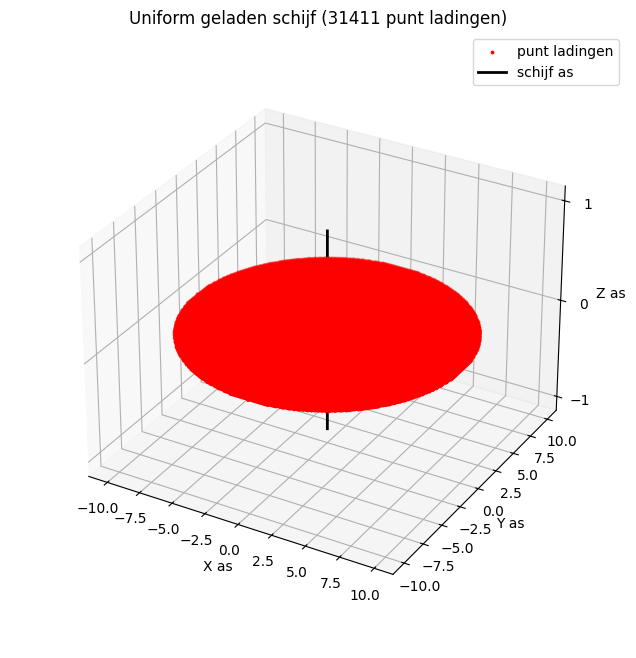

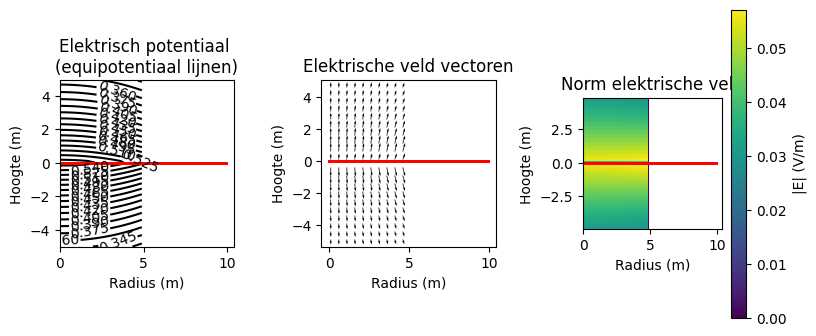

In [6]:
# Kies uit deze cel een van de variabelen en verander die in de cel hierboven pas deze cel zelf niet aan.
r, z, B = initialize_plane_grid_for_uniformly_charged_disk(height_domain, width_domain, grid_step)

idx_z_zero = np.where(abs(z) < 1e-10)[0]
z_coord_DISK = 0  # (m) positie van de schijf op de z-as
inter_charge_distance = grid_step  # (m) afstand tussen punt ladingen

V, number_point_charges_on_disk = calculate_V_disk_at_origin_uniform_surface_charge_density(z_coord_DISK, charge_one_point, disk_radius, inter_charge_distance, r, z)
Er, Ez, normE = compute_E_disk(V, B, grid_step)  # gebruik de centered finite-difference method

r_for_E = r[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de r-dimensie
z_for_E = z[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de z-dimensie

plot_results_disk(Ez, Er, normE, V, r, z, grid_step, disk_radius, z_coord_DISK, z_coord_DISK)

#### Vraag 2a

In deze vraag gaan jullie achterhalen wat de variabelen die aan het begin van opgave 2 worden geïnitialiseerd betekenen voor de nauwkeurigheid en snelheid van de code.
Pas voor deze vraag de code die net onder het kopje vraag 2 staat aan. Run dan die cel en de cel daaronder opnieuw om het resultaat van je aanpassing te zien.
1. Wat betekent de disk radius variabele die in de bovenste cel geïnitialiseerd wordt, wat gebeurt er als disk radius naar 0 gaat?
2. Wat betekent gridstep en wat voor impact heeft deze variabele op de simulatie?
3. Pak uit de tweede code cel in opdracht 2 een andere variabelen en onderzoek wat deze variabele doet en wat voor impact die heeft op de simulatie.

##### Antwoorden 2a

2a1: de disk radius variabele zorgt ervoor dat de straal een bepaalde waarde krijgt, deze variabele verandert de $R$ in $r < R$. Als de disk radius naar 0 gaat, dan is de straal 0 geworden en bestaat de schijf niet meer. 

2a2: De gridstep zorgt voor de hoeveelheid punten die worden aangemaakt. Als deze waarde kleiner wordt, duurt de simulatie langer en komen er meer punten, als deze waarde groter wordt, dan gaat de simulatie sneller, maar zijn er minder punten te zien. Als de waarde 1 of groter wordt, dan is er een error.

2a3: De gekozen variabele is: "inter_charge_distance". Deze waarde zorgt in de calculate_V_disk_at_origin_uniform_surface_charge_density functie voor de hoeveelheid punten dat gecreerd wordt door in deze functie de stapgrootte in de x- en y-coordinaten np.arange functie in te vullen. Als inter_charge_distance groter wordt, dan worden er minder punten gemaakt en gaat de simulatie sneller. Als inter_charge_distance kleiner wordt, dan worden er meer punten gemaakt en duurt de simulatie langer.

#### Vraag 2b Oppervlakte lading

Pas de cel die je in vraag 2a hebt aangepast weer aan naar de originele waardes. Run hierna alle code cellen na vraag 2 weer opnieuw.
Het aantal punten dat gebruikt wordt om de schijf te creëren is number_point_charges_on_disk en de lading van een punt is charge_one_point in Coulomb.
1. Bereken en print de ladingsdichtheid $\sigma$ met een correcte eenheid.

In [7]:
Q_totaal = number_point_charges_on_disk * charge_one_point # berekenen van de totale lading

A_disk = np.pi*disk_radius**2 # berekenen van de oppervlakte

sigma = Q_totaal/A_disk  # oppervlakteladingsdichtheid berekenen

print(f"De ladingsdichtheid van de schijf is {sigma:.3e} C/m^2")



De ladingsdichtheid van de schijf is 9.998e-13 C/m^2


##### Vraag 2c

1. Plot het elektrische potentiaal langs de $r$ as ($z = 0$ m).
2. Plot het potentiaal op de rand van de schijf in hetzelfde figuur $V = \sigma R/(\pi \epsilon_0)$
(bekijk probleem 2.51 in het Griffiths' boek)
3. Plot het potentiaal in het centrum van de schijf in hetzelfde figuur $V = \sigma R/(2 \epsilon_0)$

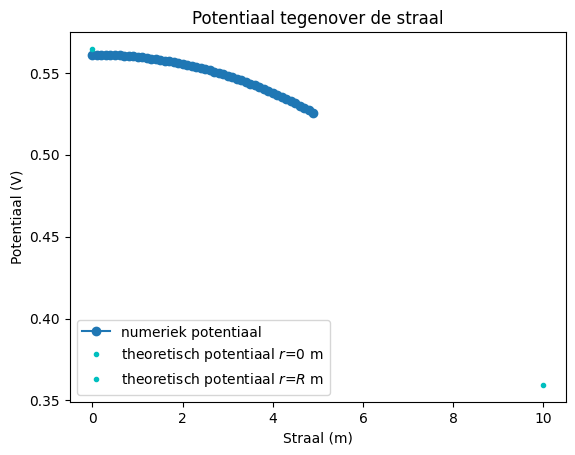

In [8]:
# Vul deze code aan zodat deze vraag 2.3 beantwoord.
idx_z_zero = np.argmin(np.abs(z))

V_0 = sigma*disk_radius/(2*epsilon0)  # potentiaal op r = 0

V_R = sigma*disk_radius/(np.pi*epsilon0) # potentiaal op de straal van de schijf
r_R = disk_radius # straal van de schijf

plt.figure()
plt.title(f"Potentiaal tegenover de straal")
plt.plot(r, V[idx_z_zero], "o-", label="numeriek potentiaal")
plt.plot(0, V_0, "c.", label="theoretisch potentiaal $r$=0 m")
plt.plot(r_R, V_R, "c.", label="theoretisch potentiaal $r$=$R$ m")
plt.legend()
plt.xlabel("Straal (m)")
plt.ylabel("Potentiaal (V)")
plt.show()

#### Vraag 2d

Het theoretische potentiaal op de as van een hele grote schijf ($R>>z$) is:
$V(z, r=0) = \frac{\sigma}{2\epsilon_0} \big( R - |z|\big)$
zie probleem 2.26 in het Griffiths boek.
1. Plot het numeriek berekend elektrische potentiaal op de $z$-as ($r=0$).
2. Plot het theoretische component van het potentiaal op de as van een schijf met ladingsdichtheid $\sigma$.
3. Sla deze plot op.


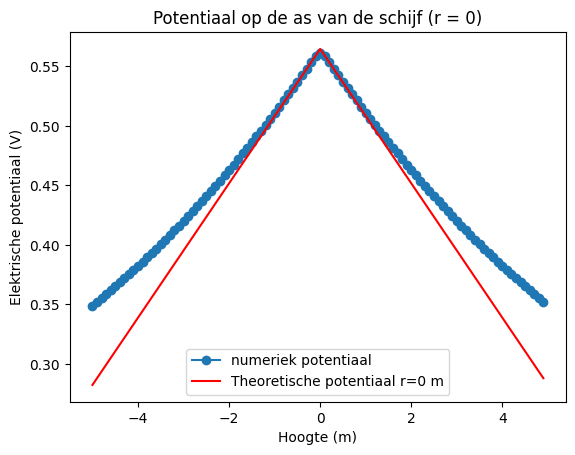

In [9]:
V_z = (sigma/(2*epsilon0))*(disk_radius-np.abs(z)) # Theoretische potentiaal op de as van de schijf


plt.figure()
plt.plot(z, V[:,0], "o-", label="numeriek potentiaal")
plt.plot(z, V_z, "r", label="Theoretische potentiaal r=0 m")
plt.title("Potentiaal op de as van de schijf (r = 0)")
plt.xlabel("Hoogte (m)")
plt.ylabel("Elektrische potentiaal (V)")
plt.legend()
plt.savefig("Potentiaal_op_as_Opdracht_2d_r=10m.png", dpi=300)
plt.show()


#### Vraag 2e

Het theoretische elektrische veld van een oneindig geladen oppervlakte is $|E| = \sigma/(2 \epsilon_0)$ (zie Example 2.5 in het Griffith boek).
1. Plot het z-component van het numeriek berekende elektrische veld op de as van de schijf ($r=0$).
2. Plot het theoretische elektrische veld voor een oneindig geladen oppervlak.
3. Sla deze plot ook op.

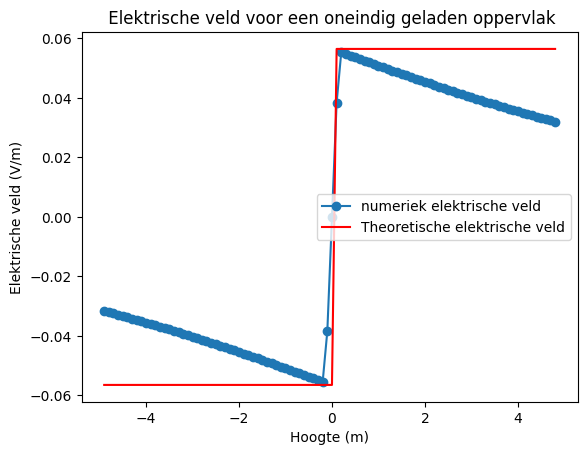

In [10]:
E_z = normE[:,0]*(z_for_E/np.abs(z_for_E))
E_z_theoretisch = (sigma/(2*epsilon0))*(z_for_E/np.abs(z_for_E)) # Theoretische elektrische veld voor een oneindig geladen oppervlak


plt.figure()
plt.plot(z_for_E, E_z, "o-", label="numeriek elektrische veld")
plt.plot(z_for_E, E_z_theoretisch, "r", label="Theoretische elektrische veld")
plt.title(" Elektrische veld voor een oneindig geladen oppervlak")
plt.xlabel("Hoogte (m)")
plt.ylabel("Elektrische veld (V/m)")
plt.legend()
plt.savefig("Elektrische_veld_Opdracht_2e_r=10m.png", dpi=300)
plt.show()


#### Vraag 2f
1. Waar benadert het elektrische veld van een uniform geladen schijf dat van een oneindig geladen plaat?
2. Beschrijf en verklaar de verschillen die je opvallen in de plot die je bij vraag 2e hebt gemaakt.

##### Antwoorden 2f

1. Op een hele kleine hoogte.
2. De theoretische waarde is voor positieve en voor negatieve hoogtes een constante waarde, maar de absolute waarde van het numeriek elektrische veld neemt af naarmate de hoogte groter wordt. Dit komt, doordat er bij een oneindig geladen plaat de lading oneindig verweg ook een kleine bijdrage levert aan het elektrische veld op r=0, deze bijdrage gaat in verhouding ook steeds meer mee tellen naarmate de hoogte groter wordt. Deze bijdrage heeft de eindig geladen plaat niet, dus neemt het elektrische veld af naarmate de hoogte groter wordt.


#### Vraag 2g

1. Pas helemaal bovenaan in vraag 2 de straal van de schijf aan.
2. Voer dan vragen 2d en 2e opnieuw uit.
3. Voeg de opgeslagen figuren hieronder toe.
4. Beschrijf de verschillen tussen de twee verschillende stralen.

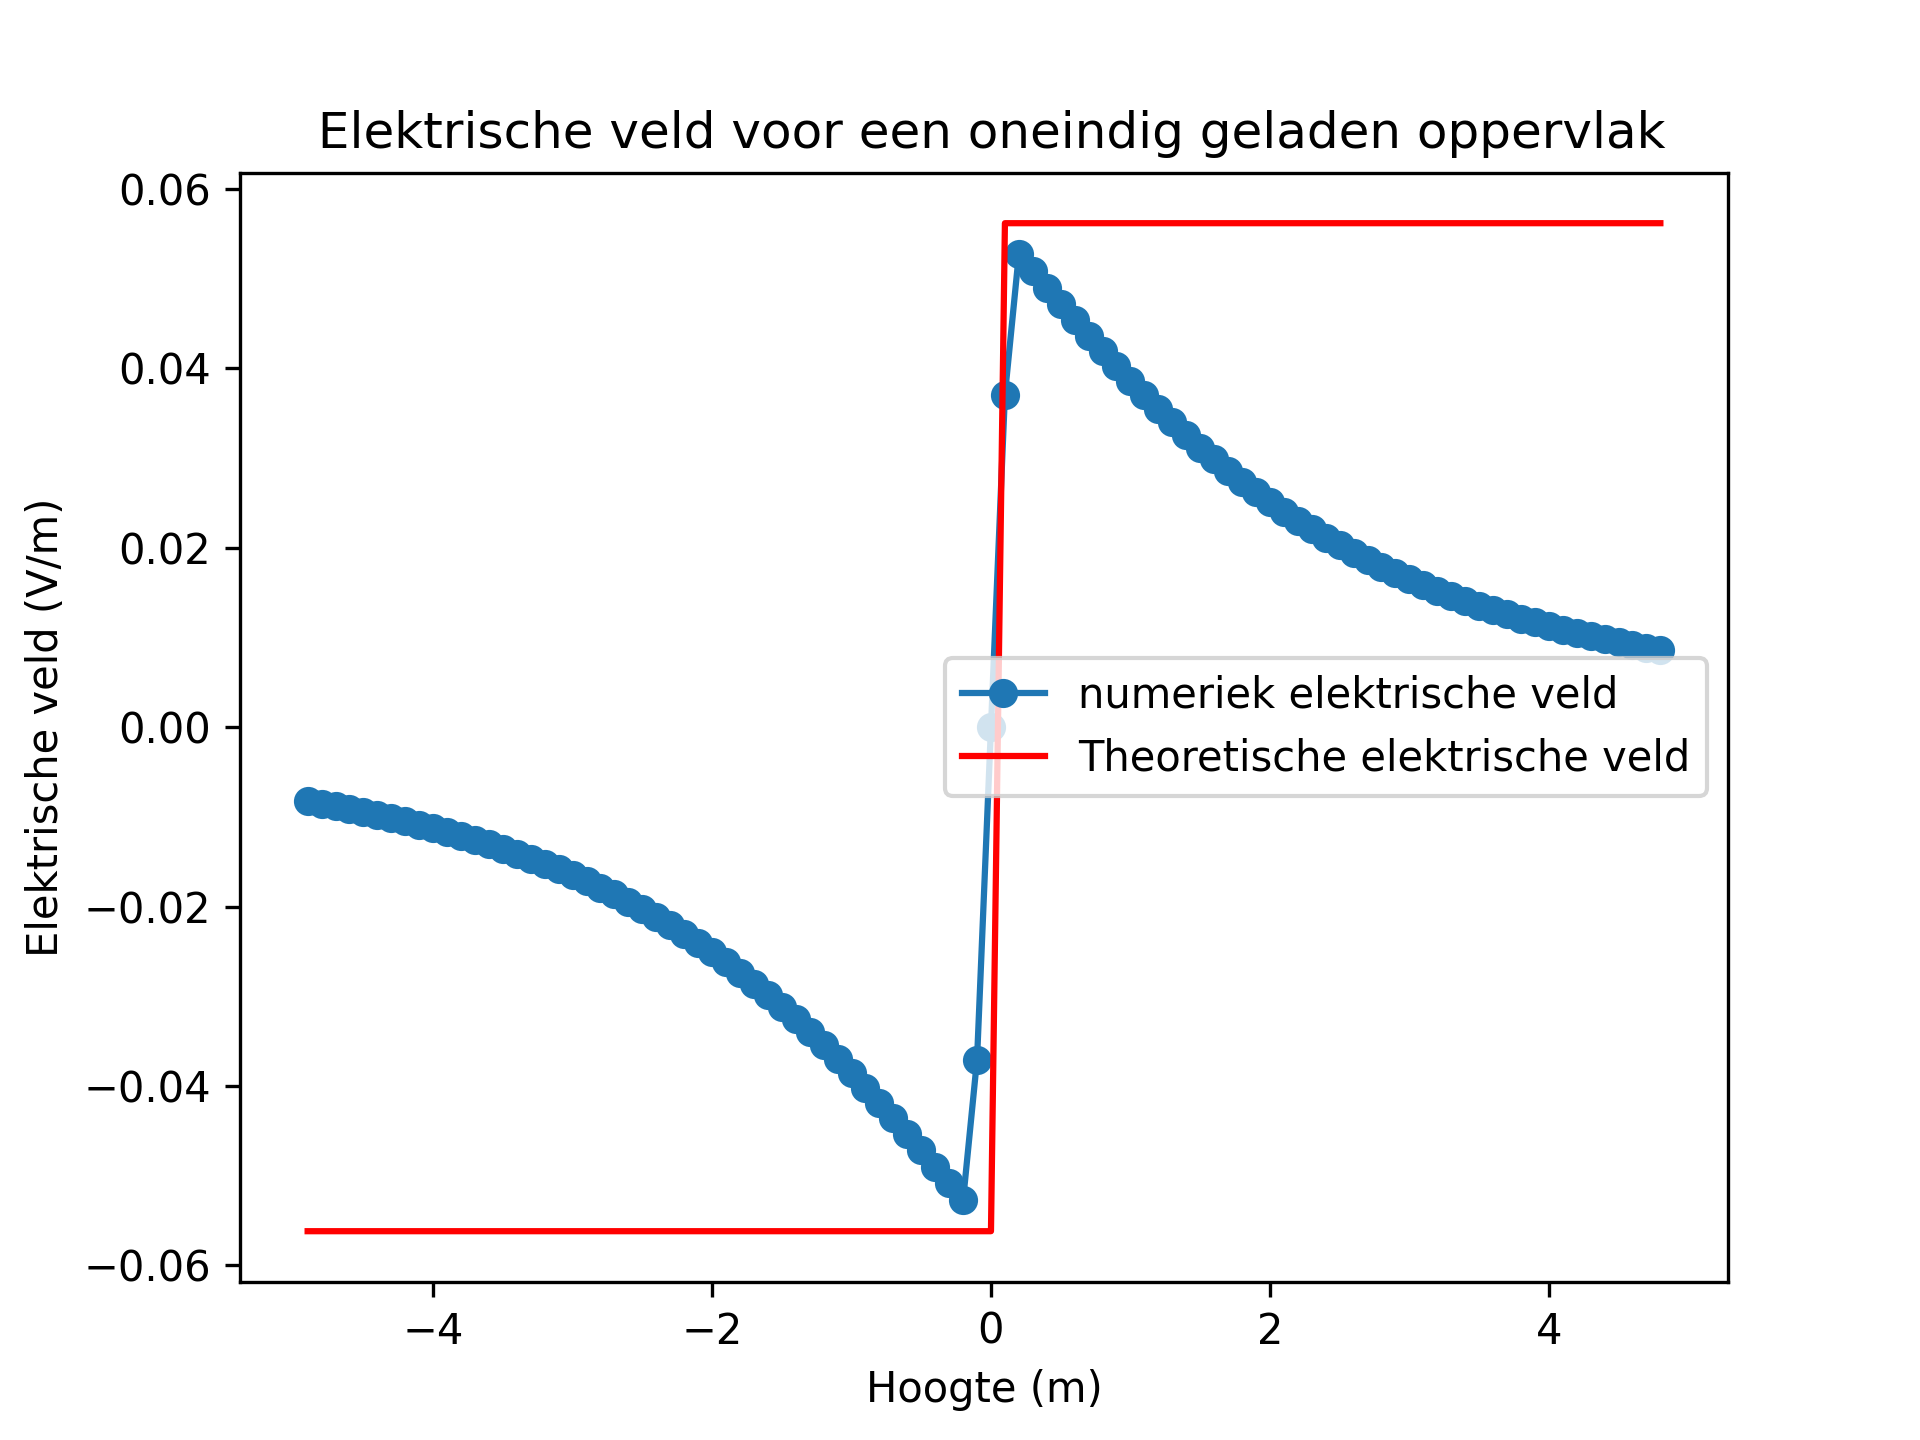

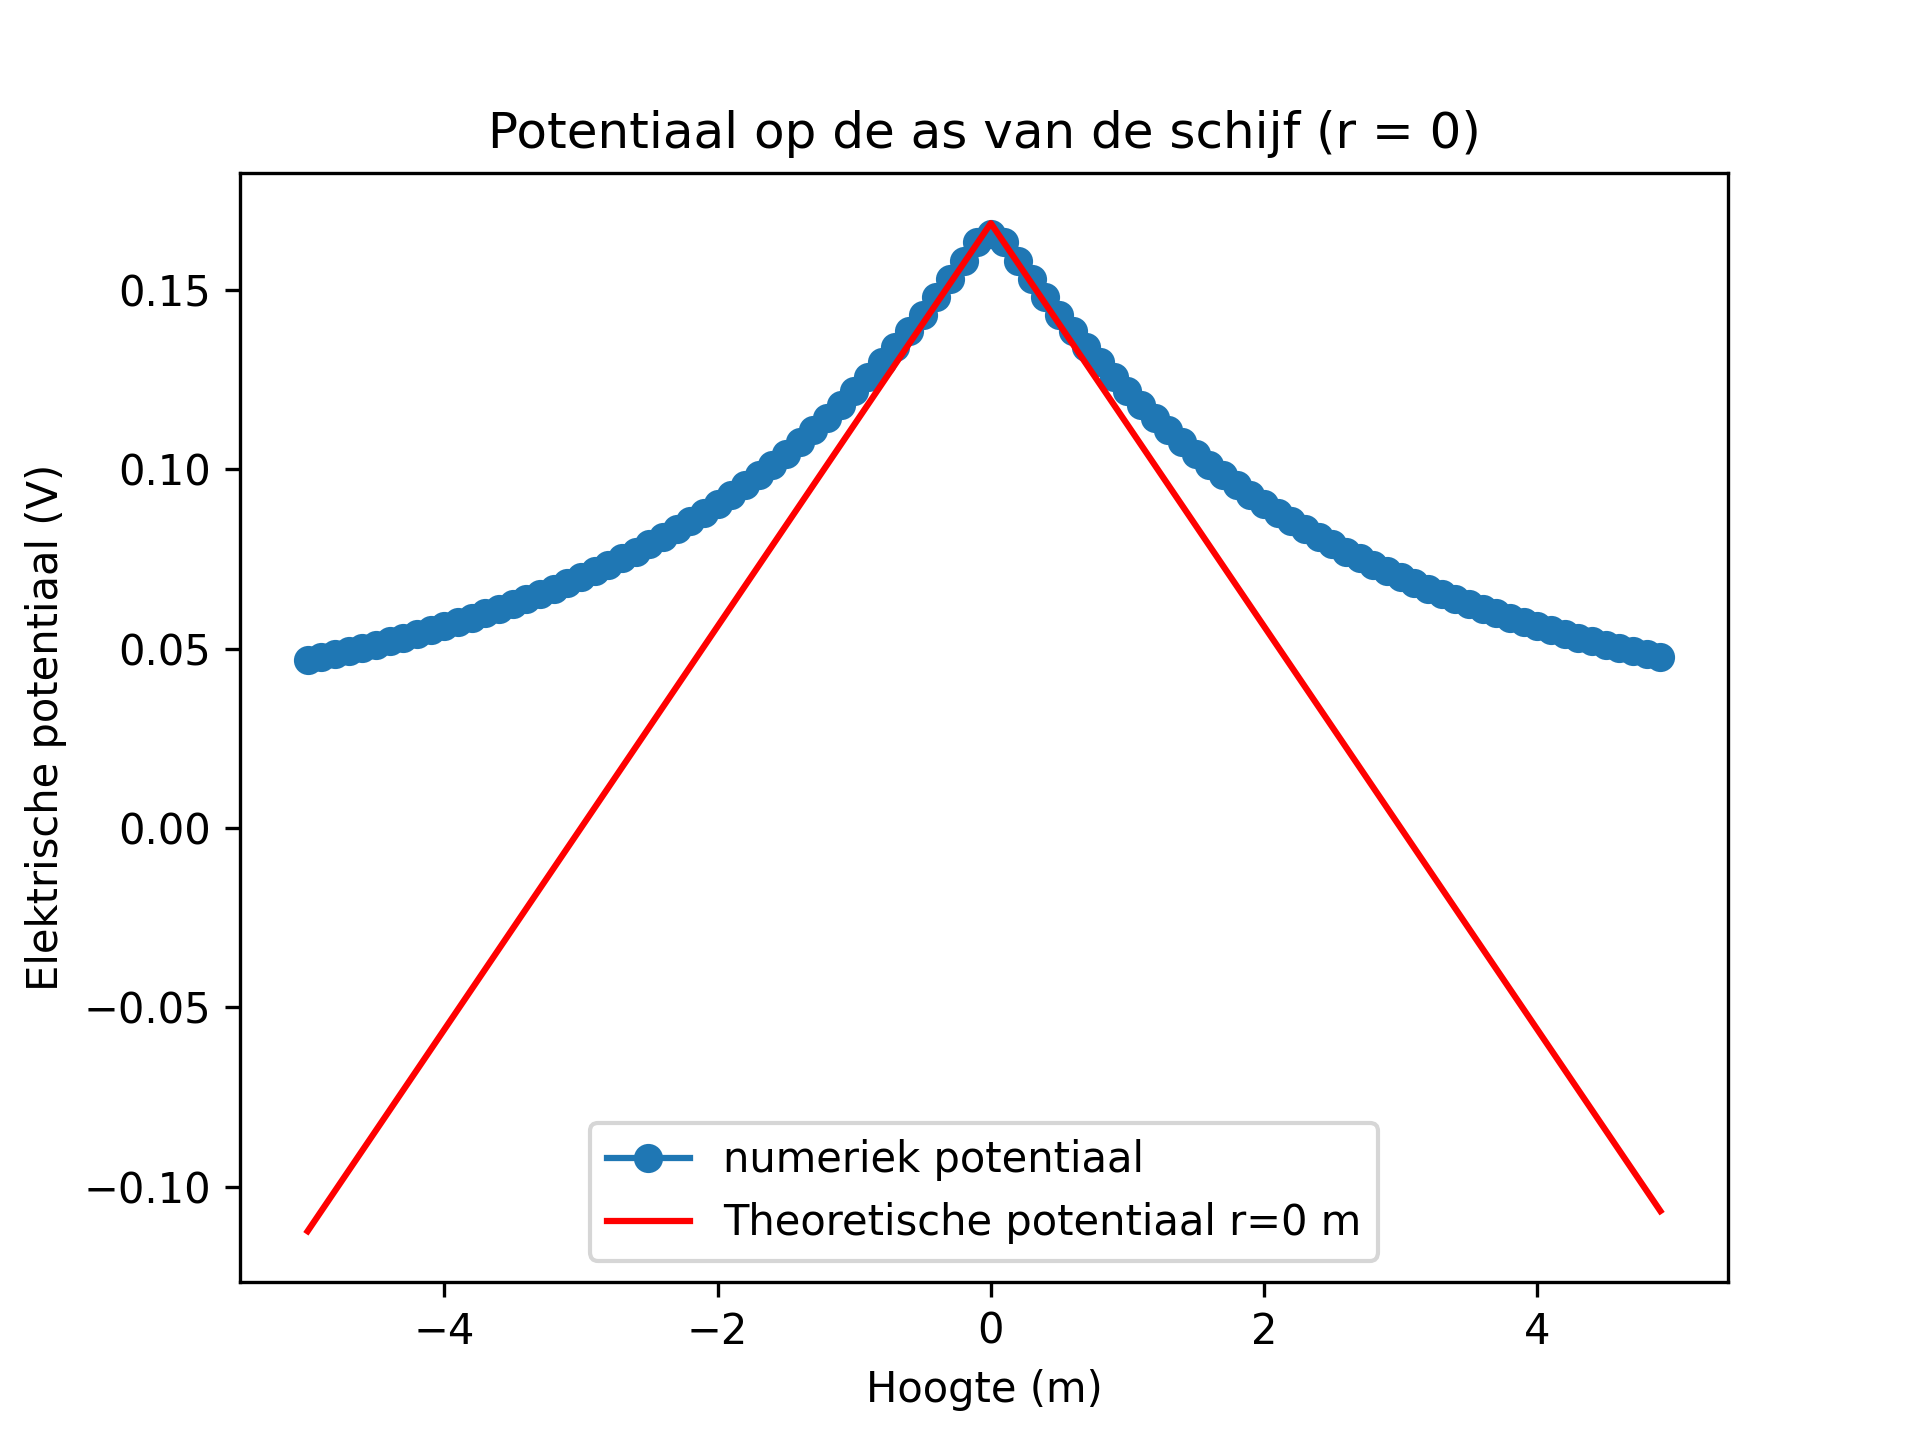

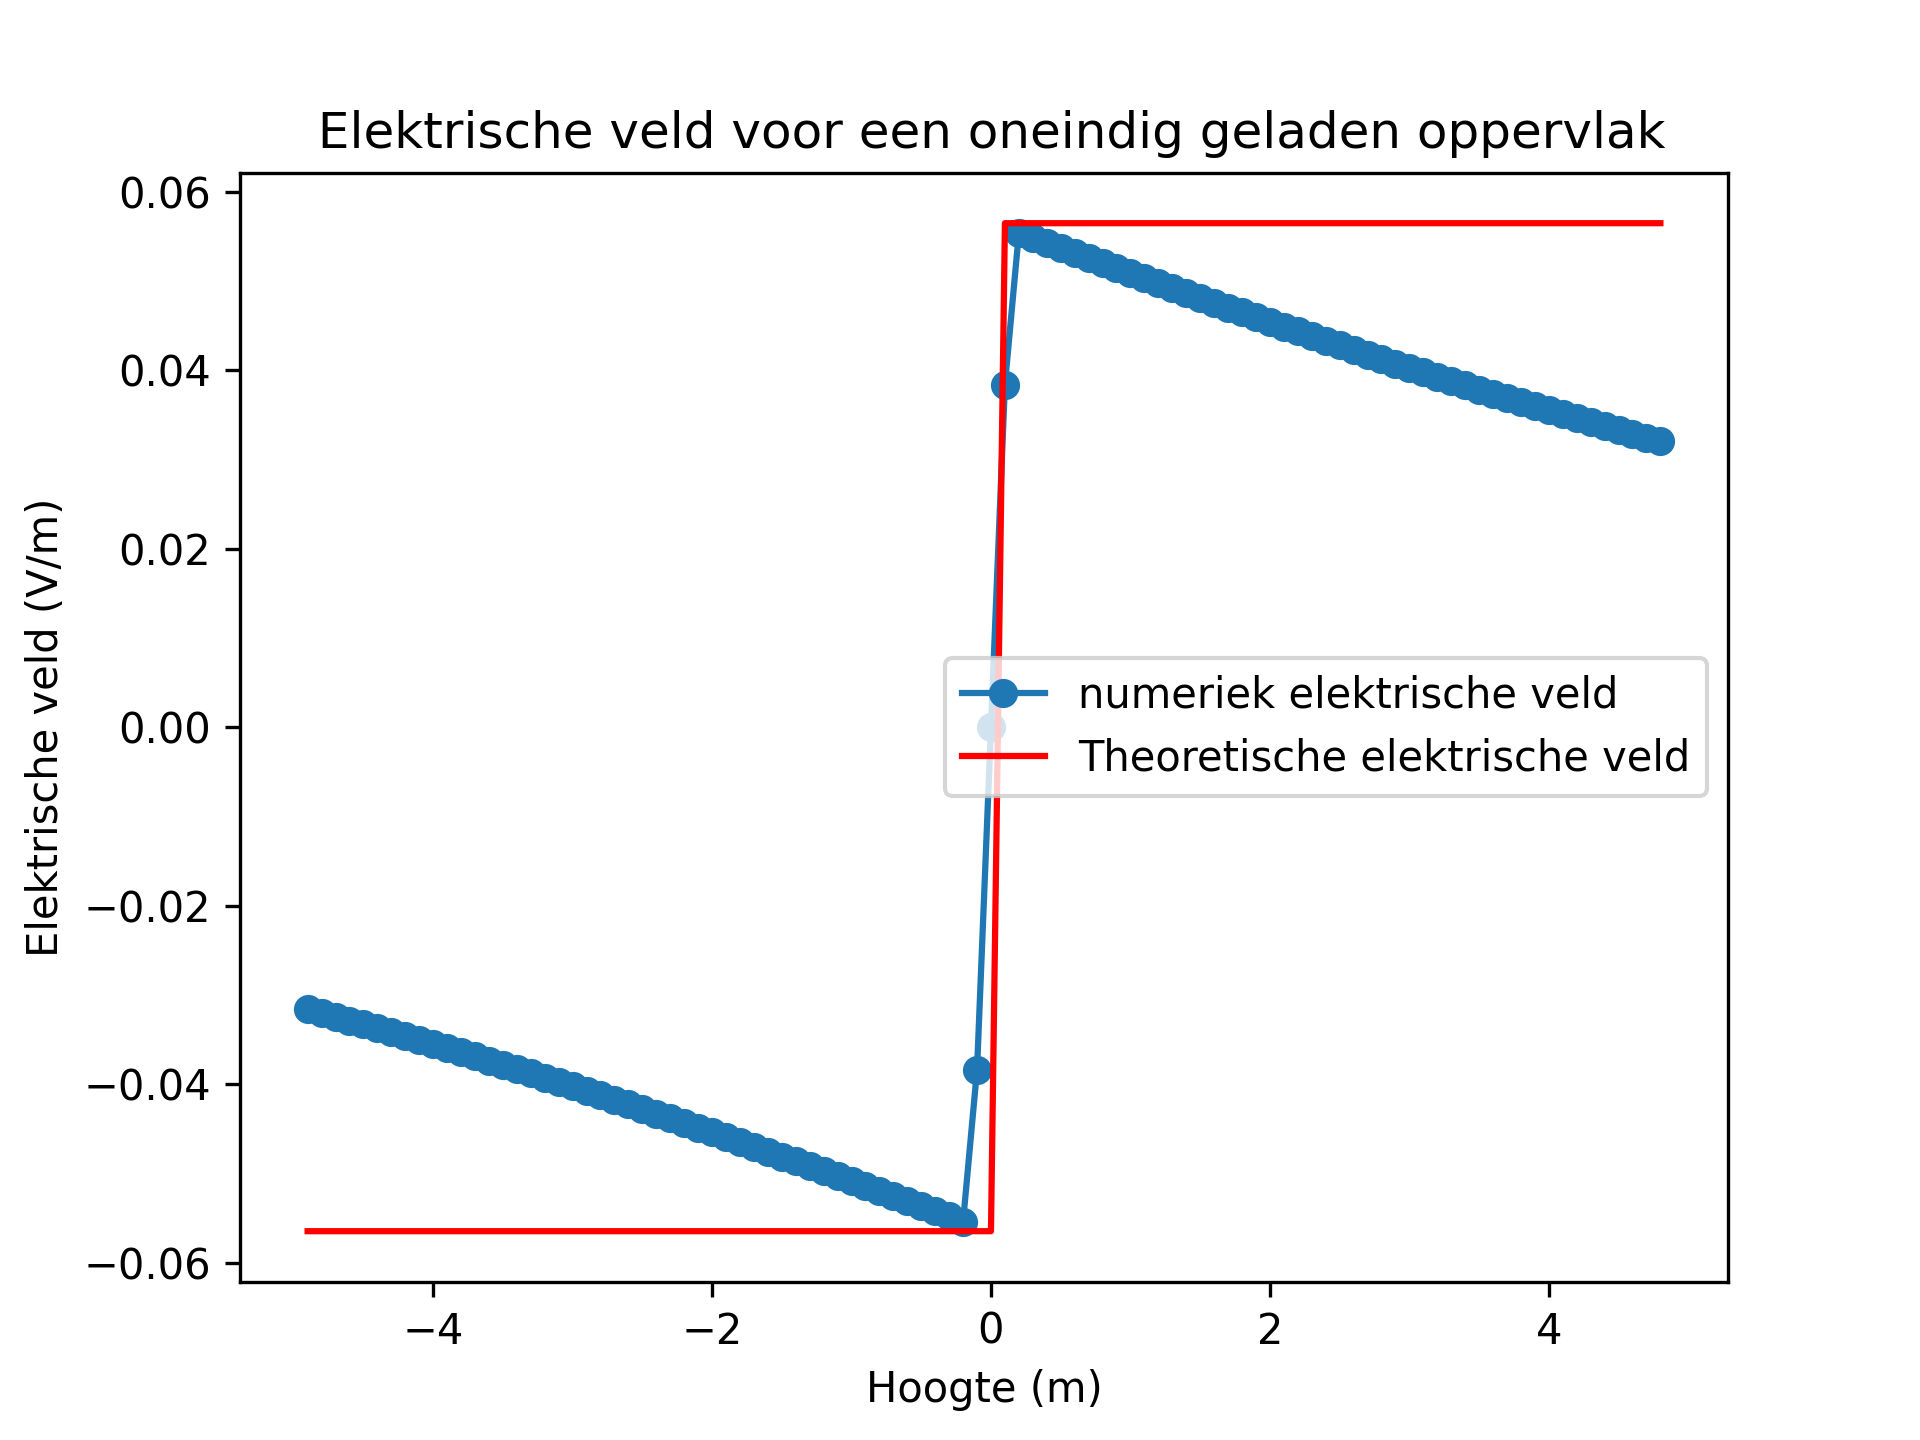

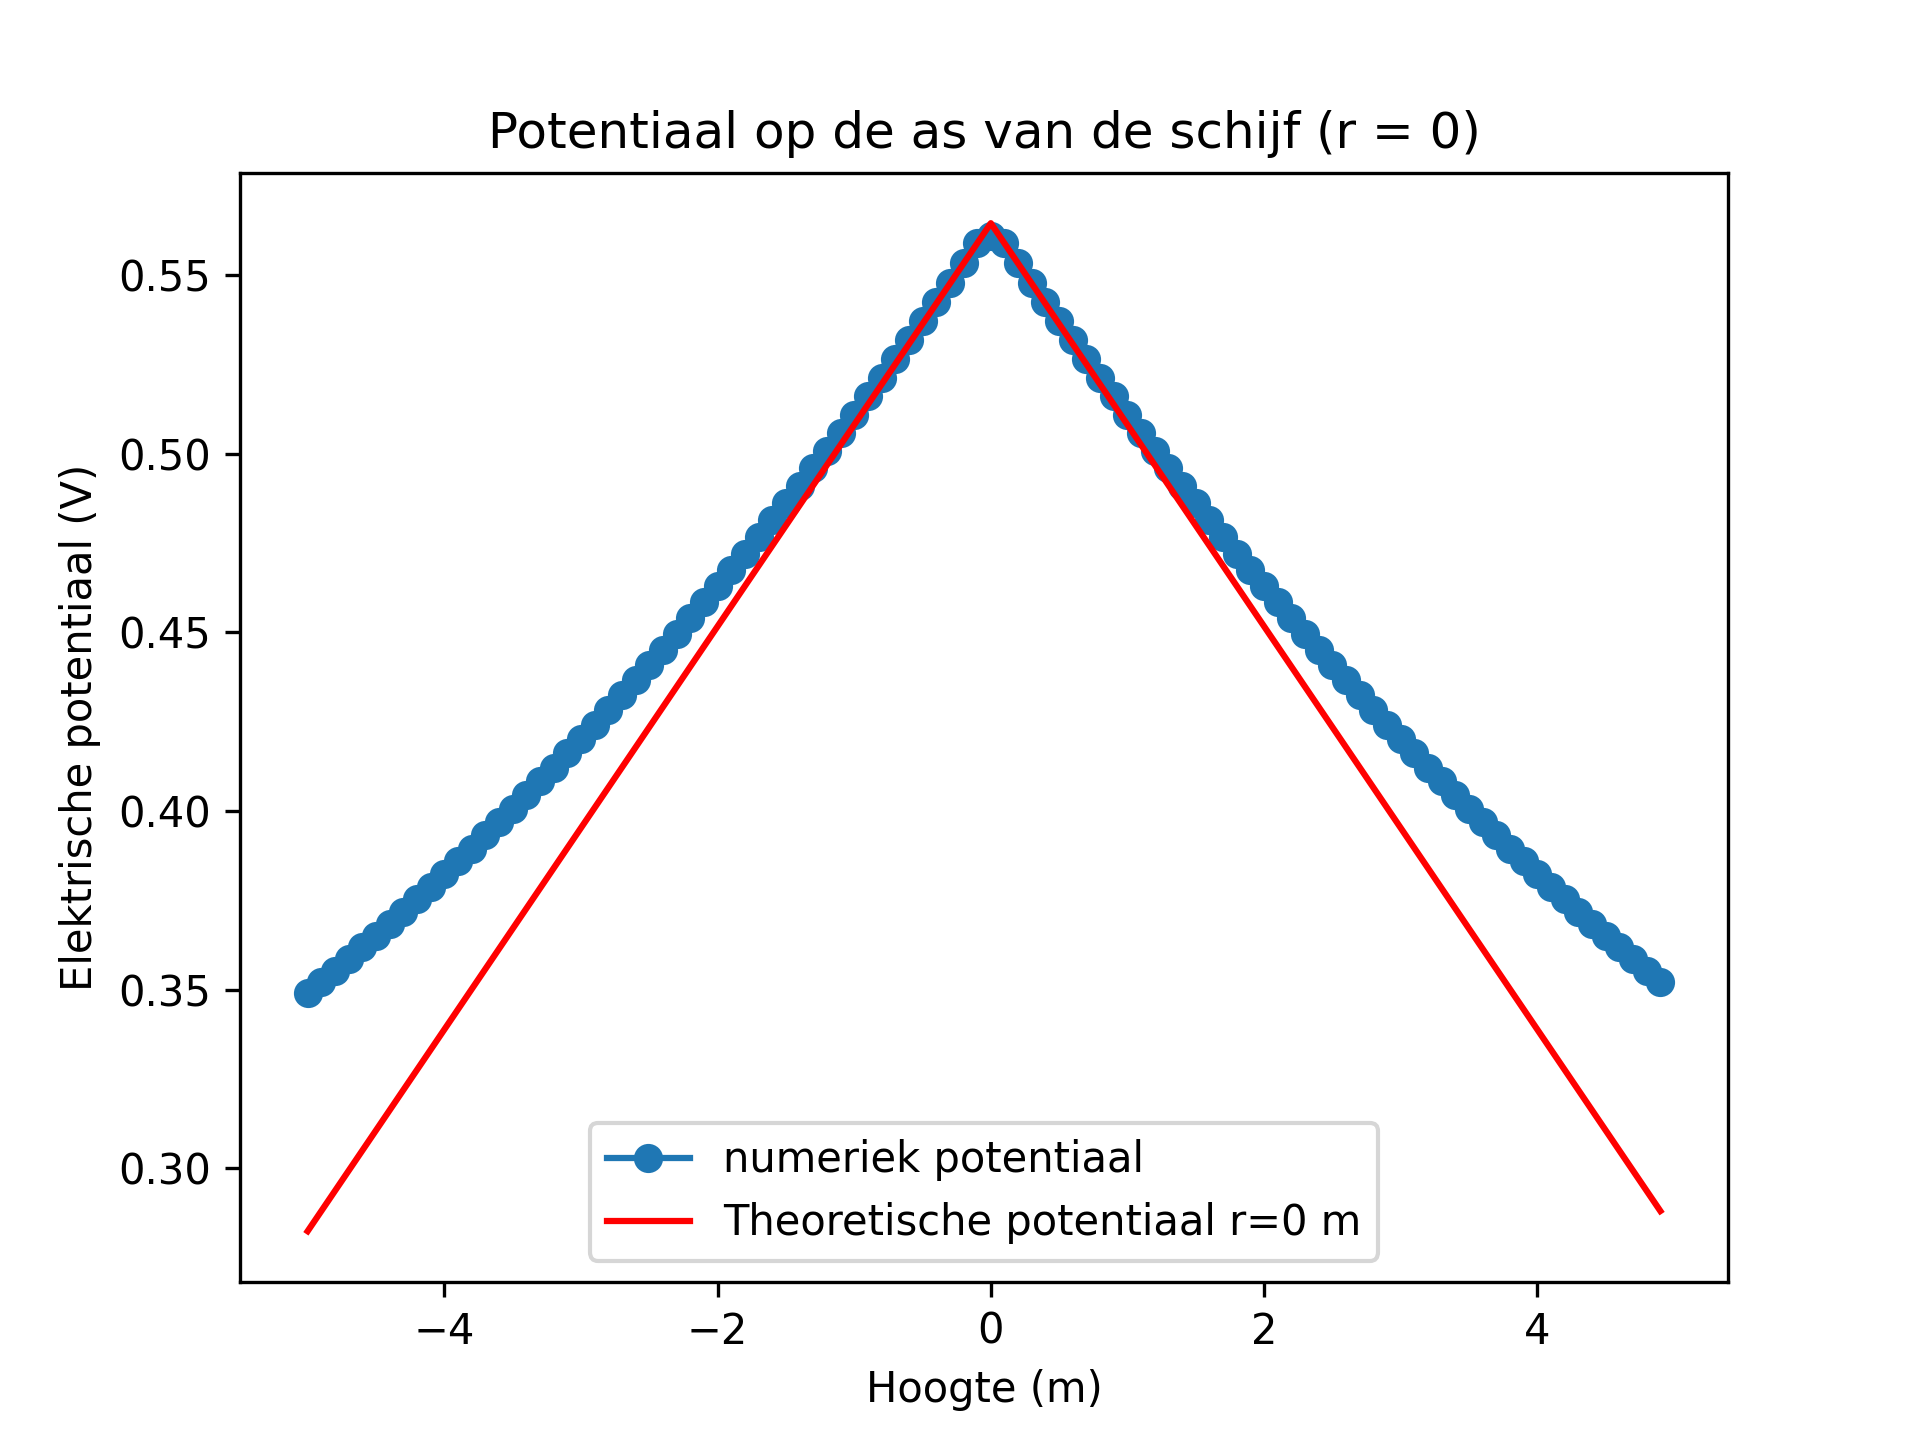

In [11]:
display(Image("Elektrische_veld_Opdracht_2e_r=3m.png"))
display(Image("Potentiaal_op_as_Opdracht_2d_r=3m.png"))
display(Image("Elektrische_veld_Opdracht_2e_r=10m.png"))
display(Image("Potentiaal_op_as_Opdracht_2d_r=10m.png"))

##### Antwoorden 2g

Bij de grotere straal volgen de numerieke waarden beter de theoretische waarde, zowel voor het potentiaal als voor het elektrische veld.

#### Vraag 2h
Het elektrische veld een afstand $z$ boven het midden van een uniform geladen schijf met een straal $R$ en oppervlakte lading $\sigma$ wordt gegeven door:
$$ \mathbf{E} = \frac{\sigma}{2\epsilon_0} \bigg[ 1- \frac{z}{\sqrt{R^2 + z^2}}\bigg] \hat{\mathbf{z}}$$
Zie probleem 2.6 in het boek van Griffith.

1. Wat moet de hoogte $z$ zijn boven de schijf zodat het elektrische veld door de schijf 10% is in vergelijking met dat van een oneindig geladen plaat?

Voeg hieronder je analytische uitwerking toe.

##### Antwoord 2h

Theoretische waarde van E: $E = \frac{\sigma}{2\epsilon_0}(1-\frac{z}{\sqrt{R^2+z^2}})$
Waarde van E voor oneindige plaat: $|E| = \frac{\sigma}{2\epsilon_0}$

$\frac{\sigma}{2\epsilon_0}(1-\frac{z}{\sqrt{R^2+z^2}}) = 0.1\frac{\sigma}{2\epsilon_0}$ \
$1-\frac{z}{\sqrt{R^2+z^2}} = 0.1$ \
$\frac{z}{\sqrt{R^2+z^2}} = 0.9$ \
$z = 0.9\sqrt{R^2+z^2}$ \
$z^2 = 0.81(R^2+z^2)$ \
$0.19z^2 = 0.81R^2$ \
$z^2 = \frac{81}{19}R^2$ \
$z = \frac{9\sqrt{19}}{19}R$ 



### 3) Een geladen schijf op een constant potentiaal

We zullen nu het verschil bestuderen tussen een uniform geladen schijf en een geleidende schijf die op een bepaald potentiaal gehouden wordt.
De code hieronder lost numeriek de laplace vergelijking op voor een geleidende schijf op een constant potentiaal. Hieruit volgt het potentiaal in de ruimte.

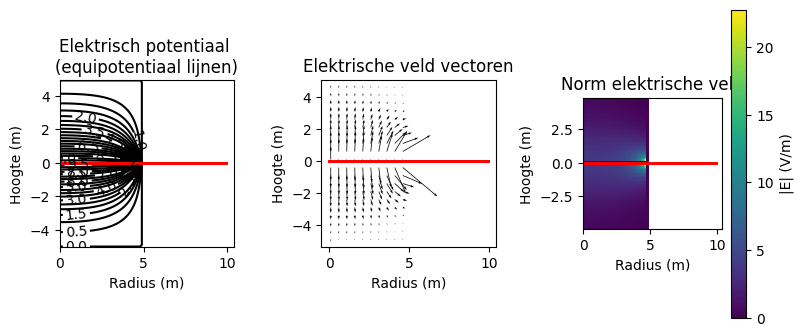

In [12]:
# Run deze cel pas deze niet aan.
V0 = 0  # electric potential at boundary of domain (V)

# Één schijf
z_pos_disk1 = 0  # z-coördinaat van de eerste geleidende schijf (m)
z_pos_disk2 = z_pos_disk1  # z-coördinaat van de tweede geleidende schijf (m)
V1 = 10  # elektrische potentiaal van de eerste geleidende schijf (V)

r, z, r_repmat, V, B, idx_R, idx_z1, idx_z2 = initialize_variables_Laplace(width_domain, disk_radius, height_domain, grid_step, z_pos_disk1, z_pos_disk2, V0, V1, V1)

"""--------------------------------------------------------------------
Veldberekening voor een geleidende schijf
"""
solve_Laplace_equation(V, B, r_repmat, grid_step, idx_z1, idx_z2, idx_R, V1, V1, 1e-3)
Er, Ez, normE = compute_E_disk(V,B,grid_step)
r_for_E = r[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de r-dimensie
z_for_E = z[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de z-dimensie

""""---------------------------------------------------------
Plot het berekende veld
"""
plot_results_disk(Ez, Er, normE, V, r, z, grid_step, disk_radius, z_pos_disk1, z_pos_disk2)

#### Vraag 3a: De simulatie van het elektrische veld van een geleidende schijf op constant potentiaal

1. Plot de elektrische veld sterkte op de as van de schijf.
2. Print de norm van het elektrische veld op de as heel dicht bij het midden van de schijf, zorg hier voor een nette opmaak.

In [13]:
###
###Jouw code hier###
###

#### Vraag 3b: De oppervlakte lading in het midden van een geleidende schijf op constant potentiaal

1. Met welke formule kan je de oppervlaktelading benaderen in het midden van de schijf($r=0$, $z=0$)?
2. Print netjes de benadering van de oppervlakte lading in het midden van de schijf.

##### Antwoord 3b

*Geef in deze markdown cel je antwoord op 3b.1.*

In [14]:
#### Print met deze cel met een nette opmaak je antwoord op vraag 3b 2.

#### Vraag 3c: De oppervlaktelading van een geleidende schijf op constant potentiaal

De oppervlakte lading $\sigma(r)$ van een geleidende schijf met straal $R$ is niet uniform verdeeld over de schijf, maar wordt gegeven door (Problems 2.58 and 2.63 Griffiths 5th edition):
$$\sigma(r) = \frac{Q}{2 \pi R \sqrt{R^2 - r^2}}$$

1. Bereken de totale lading op de schijf met behulp van vraag 3a en 3b.
2. Vergelijk de oppervlakte lading in het centrum van de geleidende schijf met dat van een uniform geladen schijf met dezelfde totale lading.
3. Plot de oppervlakte lading van de geleidende schijf met de berekende lading $Q$, tussen $r = 0$ en $R$.
4. Plot in hetzelfde figuur de oppervlaktelading van een uniform geladen schijf met dezelfde lading $Q$.


In [15]:
###
###Jouw code hier###
###

#### Vraag 3d: Het edge effect

1. Bepaal het maximum elektrische veld door de geleidende schijf in de simulatie.
2. Bepaal waar in de ruimte dit maximum zich bevindt.
3. Hoeveel hoger is dit maximum dan het elektrische veld in het midden van de schijf?
4. Print met een nette opmaak de waardes die je hier hebt berekend.
5. Leg uit wat de oorzaak van dit lokaal hoge elektrische veld is?


In [16]:
# Deze cel kan je gebruiken om van vraag 3c 1 tot en met 4 te beantwoorden.


##### Antwoord 3d.5

*Schrijf hier je argumentatie voor vraag 3d.5.*

### 4) Twee geleidende platen op potentiaal $V_1$ and $-V_1$

In de cel hieronder wordt weer op dezelfde manier als in opdracht 3 de laplace vergelijking van deze situatie opgelost.

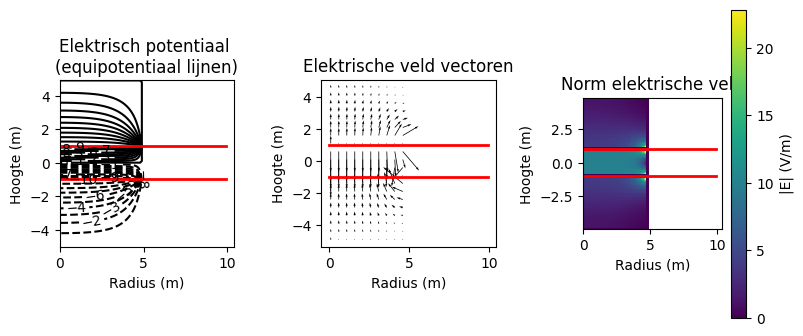

In [17]:
# Run deze cel en pas de cel aan in vraag 4f.
# Voor twee schijven
spacing_between_disks = 2  # (m)
z_pos_disk1 = spacing_between_disks/2  # z-coördinaat van de eerste geleidende schijf (m)
z_pos_disk2 = -spacing_between_disks/2  # z-coördinaat van de tweede geleidende schijf (m)
V1 = 10  # elektrische potentiaal van de eerste geleidende schijf (V)
V2 = -10  # elektrische potentiaal van de tweede geleidende schijf (V)

r, z, r_repmat, V, B, idx_R, idx_z1, idx_z2 = initialize_variables_Laplace(width_domain, disk_radius, height_domain, grid_step, z_pos_disk1, z_pos_disk2, V0, V1, V2)

"""--------------------------------------------------------------------
Veldberekening voor de twee geleidende schijven
"""
solve_Laplace_equation(V, B, r_repmat, grid_step, idx_z1, idx_z2, idx_R, V1, V2, 1e-3)
Er, Ez, normE = compute_E_disk(V, B, grid_step)
r_for_E = r[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de r-dimensie
z_for_E = z[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de z-dimensie

""""---------------------------------------------------------
Plot het berekende veld
"""
plot_results_disk(Ez, Er, normE, V, r, z, grid_step, disk_radius, z_pos_disk1, z_pos_disk2)


#### Vraag 4a: Het $z$-component van het numeriek berekende elektrische veld van twee geleidende platen

1. Plot het $z$-component van het numeriek berekende elektrische veld op de as van de schijven.


In [18]:
###
###your code here###
###

#### Vraag 4b: Verschillen tussen verschillende configuraties

1. Gegeven het potentiaal tussen twee geleidende platen, wat is het theoretische elektrische veld in elke regio? Laat dit zien met een afleiding en een schets die de verschillende regio's aangeeft.
2. Beschrijf het numeriek berekende elektrische veld op de as van de schijven, komt dit overeen met het theoretische elektrische veld?
3. Vergelijk het numeriek berekende elektrische veld tussen de twee schijven ($r=0$ and $z=0$) met dat van een enkele geleidende schijf op hetzelfde potentiaal(vraag 3a), welk voordeel heeft deze configuratie?

##### Antwoorden 4b

*Laat in deze markdown cel je antwoorden op vraag 4b zien.*

#### Vraag 4c: De capaciteit tussen twee geleidende platen

1. Bepaal de verwachte oppervlakte lading op de binnenzijde van een van de schijven.
2. Bepaal de verwachte totale lading op beide schijven.
3. Bepaal de capaciteit van deze situatie.
4. Print alle bepaalde waardes op een nette en overzichtelijke manier.

In [19]:
###
###your code here###
###

#### Vraag 4d: Theoretische oppervlakte lading

1. Is de oppervlaktelading aan de buitenkant van de schijven gelijk aan nul, beargumenteer waarom wel of niet.
2. Wat is het elektrische veld nabij het oppervlak van een geleider?

##### Antwoorden 4d

*Beantwoord in deze markdown cel vraag 4d.*

#### Vraag 4e: Numeriek berekende ladingsdichtheid

1. Welke waarde heeft het $z$-component van het elektrische veld, op de as van de schijf net onder de onderste schijf.
2. Wat is volgens de formule uit vraag 4d 2 de ladingsdichtheid aan de onderkant van de onderste geleidende plaat.
3. Welke waarde heeft het $z$-component van het elektrische veld, op de as van de schijf net boven de onderste schijf.
4. Wat is volgens de formule uit vraag 4d 2 de ladingsdichtheid aan de bovenkant van de onderste geleidende plaat.
5. Print de bepaalde waardes op een nette en overzichtelijke manier.

In [20]:
###
###Your code here###
###

#### Vraag 4f: Conclusies over de ladingsdichtheid op de twee schijven

1. Wat kan je uit vraag 4d en e concluderen over de daadwerkelijke lading op een schijf in tegenstelling tot de berekende lading in vraag 4c?
2. Wat is de invloed hiervan op de capaciteit berekend in vraag 4c?
3. Run de cel net onder het kopje vraag 4 opnieuw, maar dan met een kleinere afstand tussen de schijven, wat verandert er?

##### Antwoorden 4f

*Beantwoord vraag 4f in deze cel.*

### 5) Voorbereidende opdracht voor de fysieke DEF ontwerpopdracht

In deze vraag zullen we ingaan op benodigde voorkennis voor de fysieke ontwerpopdracht "Maak een sensor met condensatoren". De formules die je in deze opdracht opstelt, heb je nodig gedurende de fysieke ontwerpopdracht.

In deze vraag zullen we kijken naar de ideale vlakke plaat condensator. Als de afstand tussen de platen veel kleiner is dan de grootte van de platen dan wordt de aanname gemaakt dat het veld tussen de platen constant is. Deze aanname zal niet helemaal overeenkomen met de werkelijkheid, zoals je in deze opdracht en de fysieke DEF ontwerpopdracht achter zal komen.

#### Vraag 5a: Functies voor de capaciteit van enkele opdrachten

1. Vind de formule voor de capaciteit van een vlakke plaat condensator en een cilinder condensator, onder de aanname dat de afstand tussen de platen veel kleiner is dan het oppervlakte van de condensator (vlakke plaat aanname).
2. Schrijf een python functie die de relevante parameters als input neemt en de capaciteit van een vlakke plaat condensator als output heeft.
3. Vind de formule voor de capaciteit van een cilinder condensator onder de aanname dat de afstand tussen de binnen en buiten wand klein is.
4. Schrijf een python functie die de relevante parameters als input neemt en de capaciteit van een cilinder condensator als output heeft.

In [21]:
def vlakkeplaat(relevante_parameters):
    C = None
    return C

def cilinder(relevante_parameters):
    C = None
    return  C

#### Vraag 5b: Capaciteit van enkele simpele condensatoren

Gebruik in deze opdracht de functie die je bij vraag 5.1 geschreven hebt.
Hieronder staan een aantal condensatoren waarvoor jullie de capaciteit gaan berekenen. Print de capaciteit van elke condensator op een nette en overzichtelijke manier.
1. Bereken de capaciteit van een condensator gemaakt van twee vierkante plaatjes van 10 bij 10 cm met een plaatafstand van 1 mm en lucht als medium?
2. Bereken de capaciteit van een cilinder condensator met een binnendiameter van 9 mm en een buitendiameter van 10 mm met een lengte van 10 cm en lucht als medium?
3. Bereken de capaciteit van de condensatoren als de afstand tussen de platen verdubbeld
4. Bereken de capaciteit van de condensatoren uit 1 en 2 hierboven beschreven als ze gevuld zijn met water.
5. Bereken de capaciteit van de condensatoren uit 1 en 2 hierboven als de holte gevuld is met PVC.


In [22]:
###
###your code here###
###

#### Vraag 5c: Condensatoren uit het dagelijkse leven

Gebruik in deze opdracht de functie die je bij vraag 5.1 geschreven hebt.
Hieronder is een foto te zien van condensatoren die in het dagelijkse leven gebruikt wordt.
Print de capaciteiten in deze vraag op een nette en overzichtelijke manier.
1. In figuur 5.1 is een condensator te zien van 1 $\micro$F, stel deze condensator kan geapproximeerd worden als een cilinder condensator met binnendiameter 5 mm en een buitendiameter van 6 mm. Bereken wat de lengte van de condensator dan zou zijn.
Stel dat we een vierkante plaat condensator hebben van 1 $\micro$F.
2. Bereken hoe lang de vlakke plaat condensator moet zijn als er 0.5 mm tussen de platen zit en de platen 6 mm breed zijn.

![figure 5.1](figures/Condensator_1_uF.jpg)

##### Figure: 5.1 Een 1 microfarad condensator.

In [23]:
###
###Jouw code hier###
###

#### Vraag 5d: Hoge capaciteit condensatoren

1. Beargumenteer of je antwoorden uit vraag 5c realistisch zijn.
2. Bekijk je formule uit vraag 5a en bedenk hoe ze dit binnen in de condensator opgelost hebben.

##### Antwoorden 5d

*Beantwoord hier de vraag 5d.*

#### Vraag 5e: Condensator in een achtbaan

Gebruik in deze opdracht de functie die je bij vraag 5.1 geschreven hebt.

Met het vak inleidend practicum zijn jullie naar Drievliet gegaan om daar metingen aan de attracties te doen. In Drievliet staat de achtbaan Formule X, deze achtbaan heeft een topsnelheid van 70 $\frac{\text{km}}{\text{h}}$ en bevat een treintje met plek voor 6 mensen. Deze snelheid bereikt de achtbaan door heel snel een karretje weg te schieten, dit wordt gedaan door de treintjes met een lineaire inductie motor te versnellen. Om de impact hiervan op het stroomnet te beperken gebruiken zij een condensator om de energie op te slaan en dan in een keer af te staan aan het treintje. In deze opdracht gaan we kijken wat de afmetingen zouden moeten zijn als ze vlakke plaat condensatoren zouden gebruiken.

De energie die opgeslagen is in een condensator kan berekend worden met de onderstaande formule.

$E = \frac{1}{2} CV^2$
Hierin is $E$ de totaal opgeslagen energie $C$ de capaciteit en $V$ het voltage waarop de condensator opereert, in dit geval $10$ $kV$.
1. Schat de massa van een treintje dat afgeschoten wordt.
2. Bereken de totale energie van het treintje na het afschieten.
3. Bereken de totale capaciteit van de condensator.
4. Bereken het oppervlakte van een vlakke plaat condensator die deze capaciteit heeft als die gevuld is met water en de platen 1 mm van elkaar afstaan.
5. Print alle berekende waardes op een nette en overzichtelijke manier.
6. Is dit realistisch, bedenk een manier hoe dit toch kan in een relatief klein volume.


In [24]:
###
###Jouw code hier###
###

##### Antwoorden 5e

*Edit deze markdown cel met jouw idee hoe de capaciteit toch zo hoog kan zijn.*

#### Vraag 5f: Veranderende capaciteit

Gebruik in deze opdracht de functie die je bij vraag 5.1 geschreven hebt.

1. Bereken en plot de capaciteit van een vlakke plaat condensator van $10$ bij $10$ $cm$ waarbij de afstand tussen de platen lineair toeneemt van $0.5$ $mm$ tot $5$ $mm$.
2. Bereken en plot de capaciteit van een cilinder condensator met een binnendiameter van 9 mm en een buitendiameter van 10 mm en 10 cm lang, waarbij de binnencilinder er langzaam in 10 seconde uitgetrokken wordt.

In [25]:
###
###Jouw code hier###
###

## Stop hier met werken tot na de fysieke ontwerpopdracht in week 3.

### 6) Reflectie opdracht voor na de fysieke ontwerpopdracht


Als het goed is, heeft ieder teamlid van deze simulatie-opdracht een andere opstelling ontworpen hebben tijdens de fysieke ontwerpopdracht. Kies in goed overleg voor deze opdracht een van jullie twee ontwerpen.

Voeg hieronder eerst een foto in van je opstelling die je gekozen hebt.

Jullie gaan in deze opdracht het verschil tussen jullie voorspelde verband en jullie uiteindelijke verkregen kalibratie grafiek proberen te verklaren. Er zijn hiervoor drie mogelijke paden die jullie kunnen kiezen om te onderzoeken, Kies deel a, b of c en werk die volledig uit voor jullie ontwerp. Let op je hoeft er maar een uit te werken.

Verander de tekst hieronder zodat deze naar jouw foto verwijst. Zorg dat de foto in de map figures staat!
![figure 5.1](figures/Condensator_1_uF.jpg)

#### Vraag 6a: Dunne laag niet meegerekende diëlektricum
Deze vraag is goed om te kiezen als je in je ontwerp een kleine laag extra materiaal hebt en deze tijdens de ontwerpopdracht niet hebben meegenomen in je theoretisch kalibratie grafiek.

1. Maak een nieuwe schets van je opstelling waarbij je de dikte van het extra diëlektricum meeneemt.
2. Leid de analytische oplossing af van de capaciteit van de hierboven getekende situatie.
3. Programmeer de analytische oplossing in python.
4. Maak hierna een plot van het kalibratiegrafiek, oude en nieuwe analytische oplossing in een grafiek.
5. Beschrijf en verklaar de verschillen tussen de grafieken.


##### Antwoorden 6a

*Laat in deze cel je analytische oplossing met schets zien, dit mag met foto's of via LATEX.*

In [26]:
# Schrijf hier de code voor je oplossing. Gebruik hier je eerder gemaakte functies
# def condensator_extra_laag(#jouw variabelen): # Schrijf hier jouw functie
    ## je functie


### Maak hier je plot

##### Antwoorden 6a

*Beschrijf en verklaar je verschillen in deze markdown cel.*

#### Vraag 6b1: Lading op een condensator met het edge effect meegenomen

In deze opdracht gaan we verder in op het Edge effect en de invloed daarvan op de praktische capaciteit. Deze opdracht bouwt voort op de vraag 4.3.
Jullie hebben tijdens de ontwerpopdracht vierkante platen gebruikt in tegenstelling tot de ronde platen waarvoor de factoren in figure[label] zijn afgeleid. Er is onderzoek gedaan naar de factoren waarmee de praktische capaciteit vergeleken met de daadwerkelijke capaciteit verschilt dat onderzoek vind je hier: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=311759. Zoek in het onderzoek tabel 1 en formules 22 en 36 op.

1. Vergelijk de factor waarmee de schijf(disk) condensator verschilt met die van de vierkante plaat, kunnen we de vierkante plaat factor benaderen met de factor voor een disk condensator? Vergelijk het procentuele verschil tussen de factoren van de circulaire en vierkante platen, met de onzekerheden die in de meting zitten.



##### Antwoord 6b1

*Vergelijk hier de factoren tussen de circulaire en vierkante vlakke plaat condensatoren.*

#### Vraag 6b2: Capaciteit van een condensator met het edge effect meegenomen

Vanaf hier nemen we aan dat factor van de circulaire platen ongeveer gelijk is aan de factor voor vierkante platen. De factor die de capaciteit van de vlakke plaat approximatie linkt aan de werkelijke capaciteit noemen we vanaf nu de idealiteitsfactor.

1. Bereken de daadwerkelijke theoretische capaciteit van de condensator uit de sanity check 3 van de fysieke ontwerpopdracht en print deze op een nette manier.
2. Vergelijk dit met de daadwerkelijke theoretische capaciteit met de capaciteit die je op de dag zelf hebt gemeten.

Vanaf hier gaan we verder met jullie sensor van de ontwerpopdracht "Maak een sensor met condensatoren":

3. Reken je theoretische kalibratie grafiek om met de idealiteitsfactor.
4. Vergelijk je nieuwe theoretische kalibratiegrafiek van je praktische kalibratiegrafiek van de dag zelf.

In [27]:
# Schrijf hier jouw code die de vlakke plaat capaciteit omschrijft naar de werkelijke capaciteit

# def C_niet_ideaal(#relevante parameters):
    # Jouw berekeningen


##### Antwoorden 6b2

*Doe in deze markdown cel je vergelijkingen voor de sanity check condensator en je kalibratiegrafiek.*

#### Vraag 6c: Niet linear diëlektricum optie 1

Niet alle materialen zijn een lineair diëlektricum. Een aantal van de materialen die sterk niet lineair gedrag vertonen zijn: sponzen, foam & rubber. Als je in je opdracht een materiaal gebruikt heb waarvan je verwacht dat het verband sterk niet lineair is kan dit een hele goede opdracht zijn.
| Materiaal |$\chi_2$   |
| :-------------|:-------------|
| Spons|  |

Als jouw materiaal hier niet tussen staat dan kan je zelf op zoek naar een waarde van $\chi_2$ in de literatuur.

#### Vraag 6c1

1. Leidt het D veld van de condensator af uit de wet van Gauss.
2. Vindt een analytische uitdrukking voor het elektrisch veld in termen van het D veld.

##### Antwoorden 6c 1

*Antwoord vraag 6c 1.*

#### Vraag 6c2

1. Programmeer je oplossingen voor het D en E veld in python, gebruik het D veld uit je fysieke ontwerpopdracht.

Als je het elektrische veld van een vierkante vlakke plaat condensator weet kan je de capaciteit berekenen met de onderstaande formule:
$C = \frac{A
E_z \epsilon_0}{\Delta V}$

2. Plot de capaciteit van het niet lineaire diëlektricum, het theoretische kalibratiegrafiek en de uiteindelijke kalibratiegrafiek van de fysieke ontwerpopdracht.
3. Verklaar verschillen tussen de grafieken.

In [28]:
 # Pas deze code aan zodat jouw opstelling doorgerekend wordt
def E_condensator(x1, x2, D):
    return None

#### Vraag 7

Hoeveel van de afwijking tussen je metingen en je oorspronkelijke voorspelde kalibratiegrafiek wordt verklaard door wat je bij vraag 6 hebt uitgerekend? Kan je een (aantal) elektrisch veld en capaciteit gerelateerde reden(en) verzinnen wat de rest van de afwijking tussen meting en voorspelde kalibratiegrafiek kan verklaren.

##### Antwoorden 7

*Antwoord vraag 7, de laatste.*